# Assignment Week 14
## Group Assignment (Group 10)

#### 1. A classical model in mathematical ecology is the Lotka-Volterra predator-prey model. Consider a simple ecosystem consisting of rabbits that have an infinite supply of food and foxes that prey on the rabbits for their food. This is modeled by a pair of nonlinear, first-order differential equations: 
$$
\begin{aligned}
\frac{dr}{dt}&=2r -\alpha rf, \;r(0) = r_0,\\
\frac{df}{dt}&=-f + \alpha rf, \;f (0) = f_0\end{aligned} 
$$
#### where $t$ is time, $r(t)$ is the number of rabbits, $f (t)$ is the number of foxes, and $\alpha$ is a positive constant.
（沈星辰）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def RK4(f, t0, y0, t1, h):
    t = np.arange(t0, t1 + h, h)
    N = len(t)
    y = np.zeros([N, len(y0)])
    y[0] = y0
    for i in range(N-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1*h/2, t[i] + h/2)
        k3 = f(y[i] + k2*h/2, t[i] + h/2)
        k4 = f(y[i] + k3*h, t[i] + h)
        y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, y

def solve_model(a, r0, f0, t, dt):
    f = lambda y, t: np.array([2*y[0] - a*y[0]*y[1], -y[1] + a*y[0]*y[1]])
    y0 = np.array([r0, f0])
    t, y = RK4(f, 0, y0, t, dt)
    return t, y

#### (1) Compute the solution with $r_0 = 300$, $f_0 = 150$, and $\alpha = 0.01$. You should find that $t_p$ is close to 5. Make two plots, one of $r$ and $f$ as functions of $t$ and one a phase plane plot with $r$ as one axis and $f$ as the other.

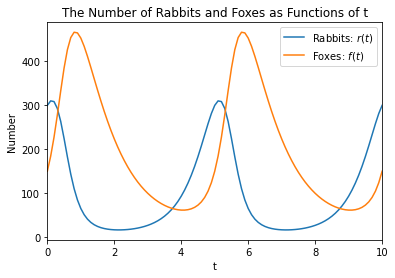

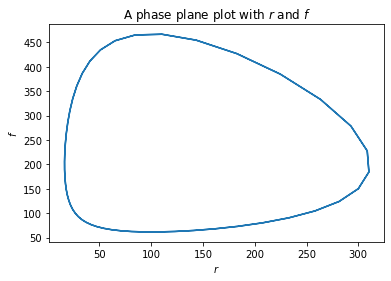

In [2]:
t, y = solve_model(0.01, 300, 150, 10, 0.1)
r = y[:, 0]
f = y[:, 1]

plt.title('The Number of Rabbits and Foxes as Functions of t')
plt.xlabel('t')
plt.ylabel('Number')
plt.plot(t, r)
plt.plot(t, f)
plt.xlim(0, 10)
plt.legend(['Rabbits: $r(t)$','Foxes: $f(t)$'])
plt.show()

plt.title('A phase plane plot with $r$ and $f$')
plt.plot(r, f)
plt.xlabel('$r$')
plt.ylabel('$f$')
plt.show()

We can see from the plot that $t_p$ is indeed close to 5.

#### (2) Compute and plot the solution with $r_0 = 15$, $f_0 = 22$, and $\alpha = 0.01$. You should find that $t_p$ is close to 6.62.

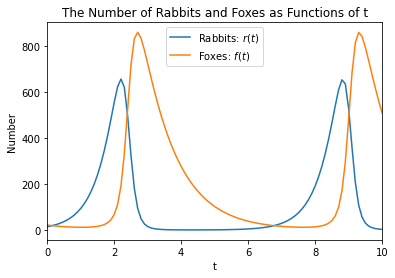

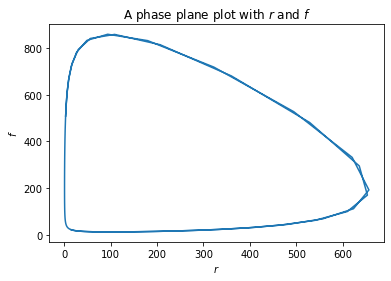

In [3]:
t, y = solve_model(0.01, 15, 22, 10, 0.1)
r = y[:, 0]
f = y[:, 1]

plt.title('The Number of Rabbits and Foxes as Functions of t')
plt.xlabel('t')
plt.ylabel('Number')
plt.plot(t, r)
plt.plot(t, f)
plt.xlim(0, 10)
plt.legend(['Rabbits: $r(t)$','Foxes: $f(t)$'])
plt.show()

plt.title('A phase plane plot with $r$ and $f$')
plt.plot(r, f)
plt.xlabel('$r$')
plt.ylabel('$f$')
plt.show()

We can see from the plot that $t_p$ is indeed close to 6.62.

#### (3) Compute and plot the solution with $r_0 = 102$, $f_0 = 198$, and $\alpha = 0.01$. Determine the period $t_p$ by trial-and-error method.

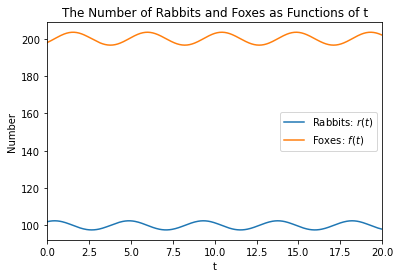

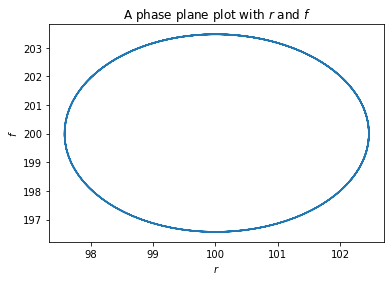

In [4]:
t, y = solve_model(0.01, 102, 198, 20, 0.05)
r = y[:, 0]
f = y[:, 1]

plt.title('The Number of Rabbits and Foxes as Functions of t')
plt.xlabel('t')
plt.ylabel('Number')
plt.plot(t, r)
plt.plot(t, f)
plt.xlim(0, 20)
plt.legend(['Rabbits: $r(t)$','Foxes: $f(t)$'])
plt.show()

plt.title('A phase plane plot with $r$ and $f$')
plt.plot(r, f)
plt.xlabel('$r$')
plt.ylabel('$f$')
plt.show()

In [5]:
for i in range(1, len(r)):
    if abs(r[i] - r[0]) < 0.05 and r[i] - r[i-1] > 0:
        break

print('The period t_p is about', t[i])

The period t_p is about 4.45


The period $t_p\approx 4.45$.

#### 2. Your task is to calculate the precession of the perihelion of Mercury.
**The** force law predicted by general relativity is 
$$
F_G \simeq \frac{GM_SM_M}{r^2}\left(1 +\frac{\alpha}{r^2}\right)
$$

where $M_M$ is the mass of Mercury and $\alpha\simeq 1.1\times 10^{-8}\ {\rm AU}^2$. 

**Since** the precision rate is fairly small, we develop the algorithm as follows:

- We calculate the rate of precession as a function of $\alpha$, with values of $\alpha$ that are much larger than the actual value for Mercury. It turns out that the rate of precession is given by $C\alpha$, where $C$ is a constant whose value we shall estimate. 
- After we have obtained the values of $C$, we can then estimate the rate of precession for $\alpha = 1.1\times 10^{-8}\ {\rm AU}^2$, which is the case that we are really interested in. 

**The** initial conditions are given based on the following considerations

(a) the length of the semimajor axis for Mercury's orbit is $a = 0.39$ AU.  
(b) The corresponding velocity, $v_1$, can be computed based on the conservation of both energy and angular momentum over the course of an orbit. It shows
$$
v_1 =\sqrt{\frac{GM_S (1 - e)}{a (1 + e)}}
$$
where $e = 0.206$ for Mercury. The distance from Mercury to the Sun is $r_{1}=\left(1+e\right)  a=0.47$ AU.

**Hint**:  Choose yr and AU as the time and length units. It can be shown that 
$$
GM_S=4\pi^2 \text{ AU}^3/\text{yr}^2
$$

（沈星辰）

**Answer**:

Solve the ODEs for $(v_x,\ v_y,\ \theta, \ r)$
$$
\left\{
\begin{aligned}
\frac{{\rm d}v_x}{{\rm d}t}&=-\frac{GM_s}{r^2}\left(1+\frac{\alpha}{r^2}\right)\cos\theta\\
\frac{{\rm d}v_x}{{\rm d}t}&=-\frac{GM_s}{r^2}\left(1+\frac{\alpha}{r^2}\right)\sin\theta\\
\frac{{\rm d}\theta}{{\rm d}t}&=\frac{1}{r}(v_y\cos\theta-v_x\sin\theta)\\
\frac{{\rm d}r}{{\rm d}t}&=v_x\cos\theta+v_y\sin\theta
\end{aligned}
\right.
$$

by using the RK4 method, where $(v_x,\ v_y)$ is the velocity of Mercury and $(\theta,\ r)$ is the polar coordinate of the position of Mercury.

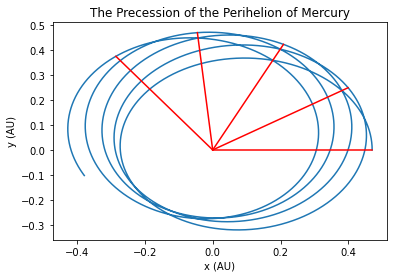

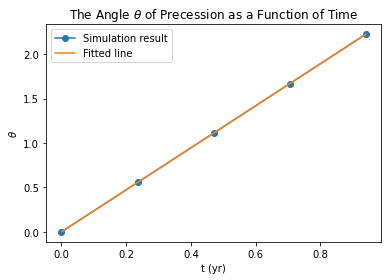

Precession Rate = 2.365084152652766


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def RK4(f, t0, y0, t1, h):
    t = np.arange(t0, t1 + h, h)
    N = len(t)
    y = np.zeros([N, len(y0)])
    y[0] = y0
    for i in range(N-1):
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1*h/2, t[i] + h/2)
        k3 = f(y[i] + k2*h/2, t[i] + h/2)
        k4 = f(y[i] + k3*h, t[i] + h)
        y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, y

def fit(x, y):
    return sum(x*y) / sum(x**2)

alpha = 0.01

e = 0.206
a = 0.39
GMs = 4 * np.pi**2

r1 = (1+e) * a
v1 = np.sqrt(GMs * (1-e) / r1)

# the initial conditions
t0 = 0
y0 = np.array([0, v1, 0, r1])

def f(y, t):  # the driving function
    fun = np.zeros(4)
    fun[0] = -GMs / y[3]**2 * (1 + alpha / y[3]**2) * np.cos(y[2])
    fun[1] = -GMs / y[3]**2 * (1 + alpha / y[3]**2) * np.sin(y[2])
    fun[2] = (y[1] * np.cos(y[2]) - y[0] * np.sin(y[2])) / y[3]
    fun[3] = y[0] * np.cos(y[2]) + y[1] * np.sin(y[2])
    return fun

# solve the ODEs with the RK4 method
t, ys = RK4(f, t0, y0, 1, 1e-4)  

vx = ys[:, 0]
vy = ys[:, 1]
angle = ys[:, 2]
r = ys[:, 3]

x = r * np.cos(angle)
y = r * np.sin(angle)

# find the farthest points and the corresponding angles theta
index = [0]
for i in range(1, len(r)):
    if r[i]>r[i-1] and r[i]>r[i+1]:
        index.append(i)
theta = np.array([angle[index[i]]-2*np.pi*i for i in range(len(index))])

rate = fit(t[index], theta)  # get the precession rate by fitting

plt.title('The Precession of the Perihelion of Mercury')
plt.plot(x, y)
for i in range(len(index)):
    plt.plot([0, x[index[i]]], [0, y[index[i]]], 'r')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.show()

plt.title(r'The Angle $\theta$ of Precession as a Function of Time')
plt.plot(t[index], theta, 'o-')
plt.plot(t[index], rate*t[index])
plt.xlabel('t (yr)')
plt.ylabel(r'$\theta$')
plt.legend(['Simulation result', 'Fitted line'])
plt.show()

print('Precession Rate =', rate)

Now calculate the precession rate of different values of $\alpha$ and estimate the value of $C$.

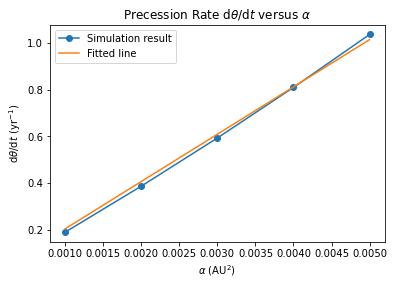

C = 203.19335027293718


In [7]:
def precession_rate(alpha=0.01):
    def f(y, t):  # the driving function
        fun = np.zeros(4)
        fun[0] = -GMs / y[3]**2 * (1 + alpha / y[3]**2) * np.cos(y[2])
        fun[1] = -GMs / y[3]**2 * (1 + alpha / y[3]**2) * np.sin(y[2])
        fun[2] = (y[1] * np.cos(y[2]) - y[0] * np.sin(y[2])) / y[3]
        fun[3] = y[0] * np.cos(y[2]) + y[1] * np.sin(y[2])
        return fun

    # solve the ODEs with the RK4 method
    t, ys = RK4(f, t0, y0, 1, 0.0001)

    vx = ys[:, 0]
    vy = ys[:, 1]
    angle = ys[:, 2]
    r = ys[:, 3]
    
    # find the farthest points and the corresponding angles theta
    index = [0]
    for i in range(1, len(r)):
        if r[i]>r[i-1] and r[i]>r[i+1]:
            index.append(i)
    theta = np.array([angle[index[i]]-2*np.pi*i for i in range(len(index))])

    rate = fit(t[index], theta)  # get the precession rate by fitting
    
    return rate

alphs = np.arange(0.001, 0.006, 0.001)
rates = np.array([precession_rate(alp) for alp in alphs])

C = fit(alphs, rates)  # get the constant C by fitting

plt.title(r'Precession Rate ${\rm d}\theta/{\rm d}t$ versus $\alpha$')
plt.xlabel(r'$\alpha\ ({\rm AU}^2)$')
plt.ylabel(r'${\rm d}\theta/{\rm d}t\ ({\rm yr}^{-1})$')
plt.plot(alphs, rates, 'o-')
plt.plot(alphs, C*alphs)
plt.legend(['Simulation result', 'Fitted line'])
plt.show()

print('C =', C)

We can estimate $C\approx 200$, so the precession rate of $\alpha=1.1\times 10^{-8}$ is
$$
\frac{{\rm d}\theta}{{\rm d}t}=C\alpha\approx2.2\times10^{-6}\ {\rm yr}^{-1}
$$

#### 3. Consider the IVP
$$
\frac{dy}{dt}  + 100y = (99t + 1) e^{-t} ,\; y(0) = 1 
$$
#### The exact solution is 
$$
y = e^{-100t} + te^{-t} 
$$
#### so that the first term quickly becomes negligible relative to the second term, but continues to govern stability.
#### Apply forward Euler's method with $h = 0.1$ and plot the solution estimates versus $0 \leq t \leq 1$. Repeat with $h = 0.01$ and plot versus $0\leq t \leq 5$. Discuss on your results.

（沈星辰）

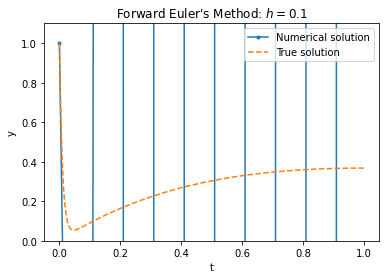

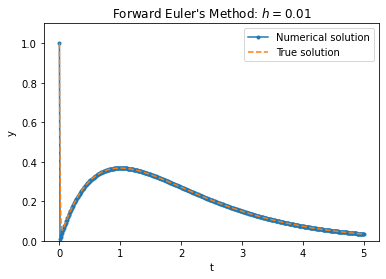

In [12]:
def forward_Euler(f, t0, y0, t1, dt):
    t = np.arange(t0, t1+dt, dt)
    N = len(t)

    y = np.zeros((N))
    y[0] = y0  # the initial condition
    for i in range(0, N-1):
        y[i+1] = y[i] + dt*f(t[i], y[i])
        
    return t, y

f = lambda t, y: (99*t + 1) * np.exp(-t) - 100*y

for [t1, h] in [1, 0.1], [5, 0.01]:
    t, y = forward_Euler(f, 0, 1, t1, h)
    
    tt = np.linspace(t[0], t[-1], 1000)
    yt = np.exp(-100*tt) + tt * np.exp(-tt)
    
    plt.title(r"Forward Euler's Method: $h={}$".format(h))
    plt.plot(t, y, '.-')
    plt.plot(tt, yt, '--')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.ylim(0, 1.1)
    plt.legend(['Numerical solution', 'True solution'])
    plt.show()

The solution is stable when $h=0.01$ while unstable when $h=0.1$. When using forward Euler's method, we should let $h$ be small enough in order to reach good stability.

#### 4. Use shooting method to solve the given boundary problem using step sizes $h=0.05$. Plot your approximate solutions and the actual solutions on the same coordinate system.

（陈张铭，沈星辰修改）

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print("""Error! Function does not have opposite 
                 signs at interval endpoints!""")
        sys.exit(1)
    x_M = (x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1

    while abs(x_L - x_R) > eps:
        if f_L*f_M > 0:   # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
            f_R = f_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter = iteration_counter + 1

    return x_M, iteration_counter

def rk4(f,y0,t,args=None): 
    # Heun's method
    dt = t[1] - t[0]
    y = np.zeros((len(t), y0.size))
    y[0] = y0
    for n in range(0, len(t) - 1):
        k1 = np.array(f(y[n], t[n], args))
        k2 = np.array(f(y[n] + dt*k1/2, t[n] + dt/2, args))
        k3 = np.array(f(y[n] + dt*k2/2, t[n] + dt/2, args))
        k4 = np.array(f(y[n] + dt*k3, t[n+1], args))        
        y[n+1] = y[n] + dt * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

(1) $y^{\prime\prime}=2y^{\prime}-y+x^{2}-1$ over $\left[  0,1\right]$ with $y\left(  0\right)  =5$ and $y\left(  1\right)  =10$, exact solution $y\left(  t\right)   =x^{2}+4x+5$


Transform the second-order differential equation into the dynamic form of 1st-order differntial equations:  
$$
\frac{d}{dx}\begin{pmatrix}
y\\
y^\prime
\end{pmatrix}
=\begin{pmatrix}
y^\prime\\
2y^\prime -y+x^2-1
\end{pmatrix}
$$
thus
$$
\frac{d}{dx}\begin{pmatrix}
y_0\\
y_1
\end{pmatrix}
=\begin{pmatrix}
y_1\\
2y_1-y_0+x^2-1
\end{pmatrix}
$$

alpha = 3.9999961853027344


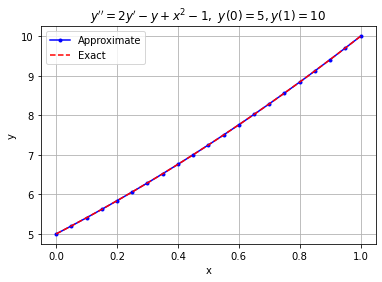

In [10]:
dx = 0.05
xlow = 0
xhigh = 1
x = np.arange(xlow,xhigh+dx,dx)

def drive_func(y,x,args=None):
    dydx = [y[1], 2*y[1]-y[0]+x**2-1]
    return dydx

def solve_ode(alpha):
    y0 = 5
    y0 = np.array([y0,alpha])   
    #y = heun(drive_func,y0,x)
    y = rk4(drive_func,y0,x)
    return y

def root_func(alpha): # alpha: y'(0)
    yL = 10
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

def shoot_bisection():
    tol = 1.0e-5
    alpha, iteration_counter = bisection(root_func,3,5,tol)
    print('alpha =', alpha)
    
    y = solve_ode(alpha)
    plt.plot(x, y[:,0],'b.-')
    plt.grid('on')    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('$y^{\prime\prime}=2y^\prime-y+x^2-1,\ y(0) = 5, y(1) = 10$')
    
if __name__ == '__main__':
    shoot_bisection()
    
f =x**2+4*x+5  # Exact solution
plt.plot(x, f, 'r--')
plt.grid('on')
plt.legend(['Approximate', 'Exact'])
plt.show()

(2) $y^{\prime\prime}+\left(  1/x\right)  y^{\prime}+(1-1/\left(4x^{2}\right)  )y=0$ over $\left[  1,6\right]$ with $y\left(  1\right)  =1$ and $y\left(  6\right)  =0$, exact solution $y\left(  x\right)  =\dfrac{0.2913843206\cos\left(  x\right)  +1.001299385\sin\left(  x\right)  }{\sqrt{x}}$

Transform the second-order differential equation into the dynamic form of 1st-order differntial equations:  
$$
\frac{d}{dx}\begin{pmatrix}
y\\
y^\prime
\end{pmatrix}
=\begin{pmatrix}
y^\prime\\
-(1/x)y^\prime-(1-(1/4x^2))y
\end{pmatrix}
$$
thus
$$
\frac{d}{dx}\begin{pmatrix}
y_0\\
y_1
\end{pmatrix}
=\begin{pmatrix}
y_1\\
-(1/x)y_1-(1-(1/4x^2))y_0
\end{pmatrix}
$$

alpha = -0.20419001579284668


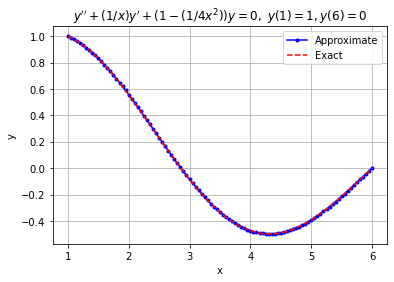

In [11]:
dx = 0.05
xlow = 1
xhigh = 6
x = np.arange(xlow,xhigh+dx,dx)

def drive_func(y,x,args=None):
    dydx = [y[1], -(1/x)*y[1]-(1-(1/(4*x**2)))*y[0]]
    return dydx

def solve_ode(alpha):
    y0 = 1
    y0 = np.array([y0,alpha])   
    y = rk4(drive_func,y0,x)
    return y

def root_func(alpha): # alpha: y'(0)
    yL = 0
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

def shoot_bisection():
    tol = 1.0e-5
    alpha, iteration_counter = bisection(root_func,-10,5,tol)
    print('alpha =', alpha)
    
    y = solve_ode(alpha)
    plt.plot(x, y[:,0],'b.-')
    plt.grid('on')    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('$y^{\prime\prime}+(1/x)y^\prime+(1-(1/4x^2))y=0,\ y(1) = 1, y(6) = 0$')
    
if __name__ == '__main__':
    shoot_bisection()
    
f =(0.2913843206*np.cos(x)+1.001299385*np.sin(x))/x**(0.5)  # Exact solution
plt.plot(x, f,'r--')
plt.grid('on')
plt.legend(['Approximate', 'Exact'])
plt.show()